# Importing All the necessary Libraries

In [41]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install jupyter_dash

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go

# Loading the Datasets

In [7]:
purchase_data = pd.read_csv("purchase_behaviour.csv")
transaction_data = pd.read_csv("transaction_data.csv")

In [8]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Here, merging both the files on LYLTY_CARD_NBR

In [11]:
merged_df = transaction_data.merge(purchase_data, on="LYLTY_CARD_NBR",how="inner")

In [18]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [15]:
merged_df.shape

(264836, 10)

# Inferences
* The dataset consists of 264836 entries and 10 columns.

>> Brief overview of each column:

* DATE - The date of transaction being made or order being placed.

* STORE_NBR - The store associated to a particular Order.

* LYLTY_CARD_NBR - A Unique Loayality Card Identification Number

* TXN_ID - Transactional ID

* PROD_NBR - Serial Number Of the product.

* PROD_NAME - Name of the product.

* PROD_QTY - The Quantity Of products being placed at a single order.

* TOT_SALES - The total number of sales for a particular product.

* LIFESTAGE - The Age Group Of the customers.

* PREMIUM_CUSTOMER - From which group a customer belongs to - Budget, Mainstream or Premium.s.d to be addressed.

## Summary Statistics
* Generating summary statistics to gain initial insights into the data distribution:

In [19]:
# Summary statistics for numerical variables
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


## Statistical Inference

### 1. DATE:
- The transactions span from a minimum date of **43282** to a maximum date of **43646**.
- The **mean transaction date** is approximately **43464**, with a standard deviation of **105.39 days**.
- Transactions are distributed across the time period, with **25% of transactions occurring before 43373** and **75% occurring before 43555**.

### 2. STORE_NBR:
- Transactions occurred across **272 different store numbers**.
- The **mean store number** for transactions is approximately **135**, with a standard deviation of **76.78**.
- Store numbers range from **1 to 272**, indicating coverage across a wide range of stores.

### 3. LYLTY_CARD_NBR:
- Transactions involve a diverse range of **loyalty card numbers**, spanning from **1000 to 2373711**.
- The **average loyalty card number** used in transactions is around **135549**, with a considerable standard deviation of **80579.98**.
- The **median (50th percentile) is 130357.5**, indicating that half of the transactions involve cards with numbers below this value.

### 4. TXN_ID:
- Each transaction is uniquely identified by a **transaction ID**.
- IDs range from **1 to 2415841**, with an **average transaction ID** of approximately **135158** and a standard deviation of **78133.03**.
- The **median transaction ID is 135137.5**, showing that half of the transactions have IDs below this value.

### 5. PROD_NBR:
- Products purchased are identified by numbers ranging from **1 to 114**.
- The **mean product number purchased** is approximately **56.58**, with a standard deviation of **32.83**.
- The most frequently purchased products are likely around the **median of 56**.

### 6. PROD_QTY:
- The quantity of products purchased per transaction ranges from **1 to 200**.
- On average, customers purchase around **1.91 products per transaction**, with a standard deviation of **0.64**.
- The quantity purchased is typically **2** (**25th, 50th, and 75th percentiles**), indicating that most transactions involve buying **2 products**.

### 7. TOT_SALES:
- Total sales per transaction range from **1.5 to 650**.
- The **mean total sales amount per transaction** is approximately **7.30**, with a standard deviation of **3.08**.
- Sales values are centered around the **median of 7.4**, with **25% of transactions having total sales below 5.4** and **75% having sales below 9.20**.

---

These inferences provide a detailed understanding of the dataset's characteristics, highlighting key statistics and distributions for each variable observed in the transactions.



In [20]:
# Summary statistics for categorical variables
merged_df.describe(include='object').T

,count,unique,top,freq
PROD_NAME,264836,114,Kettle Mozzarella Basil & Pesto 175g,3304
LIFESTAGE,264836,7,OLDER SINGLES/COUPLES,54479
PREMIUM_CUSTOMER,264836,3,Mainstream,101988


## Inferences

### 1. PROD_NAME (Product Name):
- The dataset contains **264,836 transactions** and **114 unique products**.
- The most frequently purchased product is **"Kettle Mozzarella Basil & Pesto 175g"**, appearing **3,304 times**.
- This suggests that product diversity is relatively low, with a few products dominating sales.

### 2. LIFESTAGE (Customer Lifestage):
- There are **7 unique lifestage categories** in the dataset.
- The most common customer segment is **"OLDER SINGLES/COUPLES"**, making up **54,479 transactions**.
- This indicates that a significant portion of sales comes from older individuals or couples.

### 3. PREMIUM_CUSTOMER (Customer Segment):
- The dataset includes **3 unique customer segments**.
- The most common segment is **"Mainstream"**, accounting for **101,988 transactions**.
- This suggests that the majority of customers belong to the **mass-market segment**, rather than premium or budget categories.

# Data Cleaning and Transformation
**Since there are no NULL values present in the data we will directly look into duplicate values**

## Handling Duplicates

In [21]:
# Finding duplicate row (keeping all instances)
duplicate_rows = merged_df[merged_df.duplicated(keep=False)]

In [22]:
duplicate_rows.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


In [24]:
# Displaying the number of duplicate rows
print(f"The dataset contains {merged_df.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 1 duplicate rows that need to be removed.


In [26]:
# Removing duplicate rows
merged_df.drop_duplicates(inplace=True)

In [27]:
# Getting the number of rows in the dataframe
merged_df.shape[0]

264835

In [28]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


## Finding TOP Most Profitable Customers

In [31]:
merged_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69690
Name: count, dtype: int64

In [32]:
merged_df['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

In [33]:
customer_loyalty = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(
    total_spent=("TOT_SALES", "sum"),
    num_transactions=("TXN_ID", "count")
).reset_index()

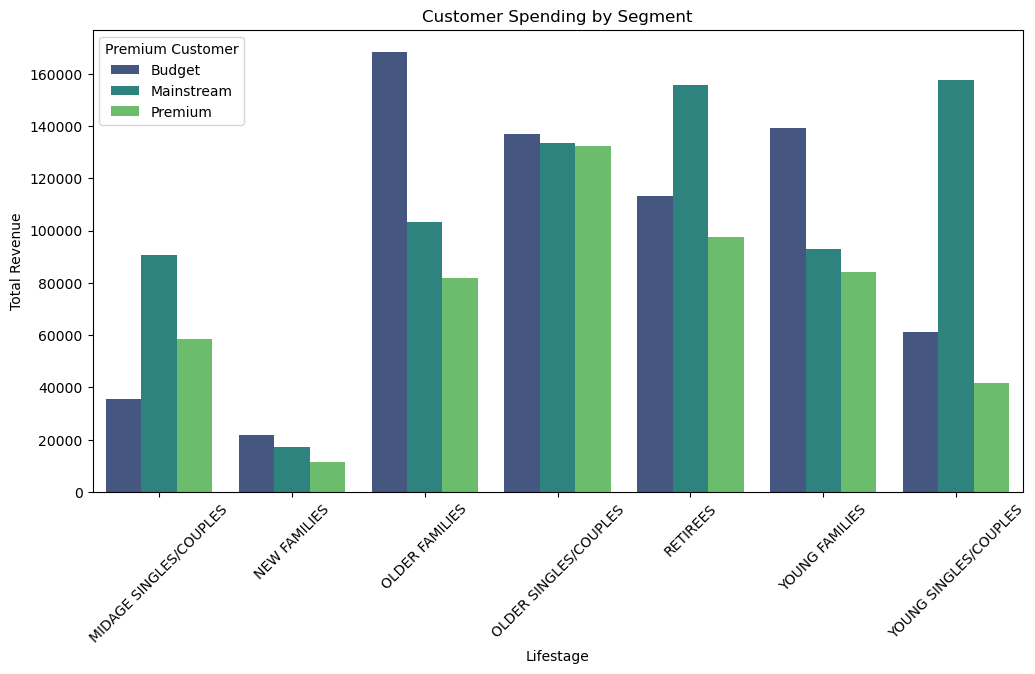

In [36]:
# Visualization - Spending by Customer Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_loyalty, x="LIFESTAGE", y="total_spent", hue="PREMIUM_CUSTOMER", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Total Revenue")
plt.title("Customer Spending by Segment")
plt.legend(title="Premium Customer")
plt.show()

### Key Obeservations :

#### Older Singles/Couples and Retirees appear to be the most loyal customers, as they contribute the highest total revenue. Their spending is consistent across all premium categories (Budget, Mainstream, and Premium).

#### Older Families also show strong spending habits, particularly among Budget and Mainstream segments.

#### Young Singles/Couples and New Families have the lowest total spending, indicating that they are less frequent or less high-value buyers.

### Most Loyal Customers :

#### Retirees (Mainstream & Budget segments) – They spend the most, likely due to stable disposable income and consistent shopping habits.

#### Older Singles/Couples (All segments) – They exhibit strong purchasing behavior, making them valuable customers to target for loyalty programs or personalized promotions.

#### Older Families (Budget segment) – This group also spends significantly, possibly purchasing in bulk for household needs.

## TOP 3 MOST PROFITABLE PRODUCTS

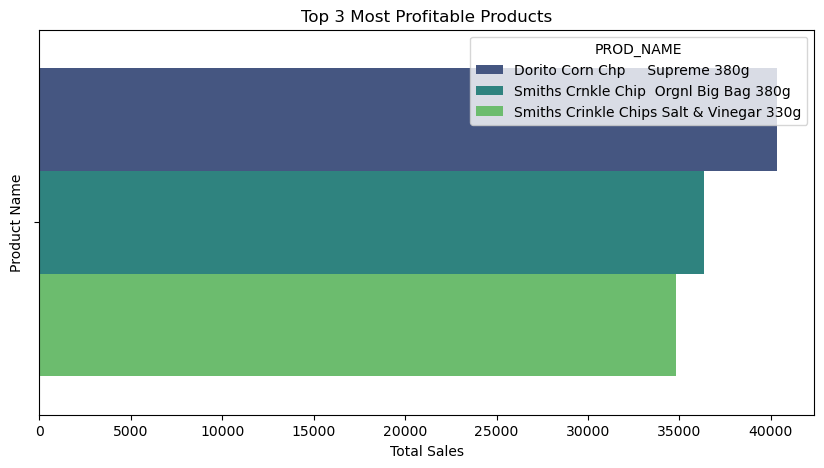

In [38]:
top_products = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(3)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, hue=top_products.index,palette="viridis")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

# Inferences
#### TOP 3 MOST PROFITABLE PRODUCTS ARE :

#### 1. DORITO CORN CHIPS (380 GMS.)

#### 2. SMITHS CRINKLE CHIPS , ORIGINALS (380 GMS.)

#### 3. SMITHS CRINKLE CHIPS , SALT & VINEGAR (330 GMS.)

## DASHBOARD FOR ALL THE PLOTS AND KEY FINDINGS

In [45]:
# Grouping data for insights
spending_by_lifestage = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Identifying top products based on sales
top_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products_sorted = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Counting transactions per segment
transactions_per_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().reset_index()
transactions_per_segment.rename(columns={'TXN_ID': 'Total Transactions'}, inplace=True)

# Creating visuals
fig1 = px.pie(spending_by_lifestage, 
              names="LIFESTAGE", 
              values="TOT_SALES", 
              color="PREMIUM_CUSTOMER", 
              title="Customer Spending by Segment", 
              labels={"TOT_SALES": "Total Sales", "LIFESTAGE": "Lifestage"})

fig2 = px.bar(top_products_sorted, 
              x="TOT_SALES", 
              y="PROD_NAME", 
              title="Top 3 Best-Selling Products", 
              labels={"TOT_SALES": "Total Sales", "PROD_NAME": "Product"}, 
              orientation='h')

fig3 = go.Figure()
for segment in transactions_per_segment['PREMIUM_CUSTOMER'].unique():
    segment_data = transactions_per_segment[transactions_per_segment['PREMIUM_CUSTOMER'] == segment]
    fig3.add_trace(go.Bar(x=segment_data['LIFESTAGE'], 
                         y=segment_data['Total Transactions'], 
                         name=f"Premium: {segment}",
                         hoverinfo='x+y',
                         marker={'color': 'royalblue' if segment == 'Premium' else 'lightgray'}))

fig3.update_layout(title="Total Transactions per Customer Segment", 
                  xaxis_title="Lifestage", 
                  yaxis_title="Total Transactions", 
                  barmode="stack")

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1("Customer Insights Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Div([dcc.Graph(figure=fig1)], style={'width': '48%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(figure=fig2)], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
    
    html.Div([
        dcc.Graph(figure=fig3)
    ], style={'paddingTop': '20px'}),
])

# Running the app
if __name__ == '__main__':
    app.run_server(debug=True)